In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = [16, 10] 

In [7]:
def read_data(filename):
    with open(filename) as f:
        d = np.array(f.read().strip().split(','), dtype=np.int64)
        return d[500:] / 1e6

In [18]:
prefix = 'data/c7cc95fe'
latencies = {}
latencies[2] = read_data(prefix + '/3/21/AT_MOST_ONCE/1000/flamestream/latency/lat.data')
latencies[4] = read_data(prefix + '/5/14/AT_MOST_ONCE/1000/flamestream/latency/lat.data')
latencies[8] = read_data(prefix + '/9/10/AT_MOST_ONCE/1000/flamestream/latency/lat.data')

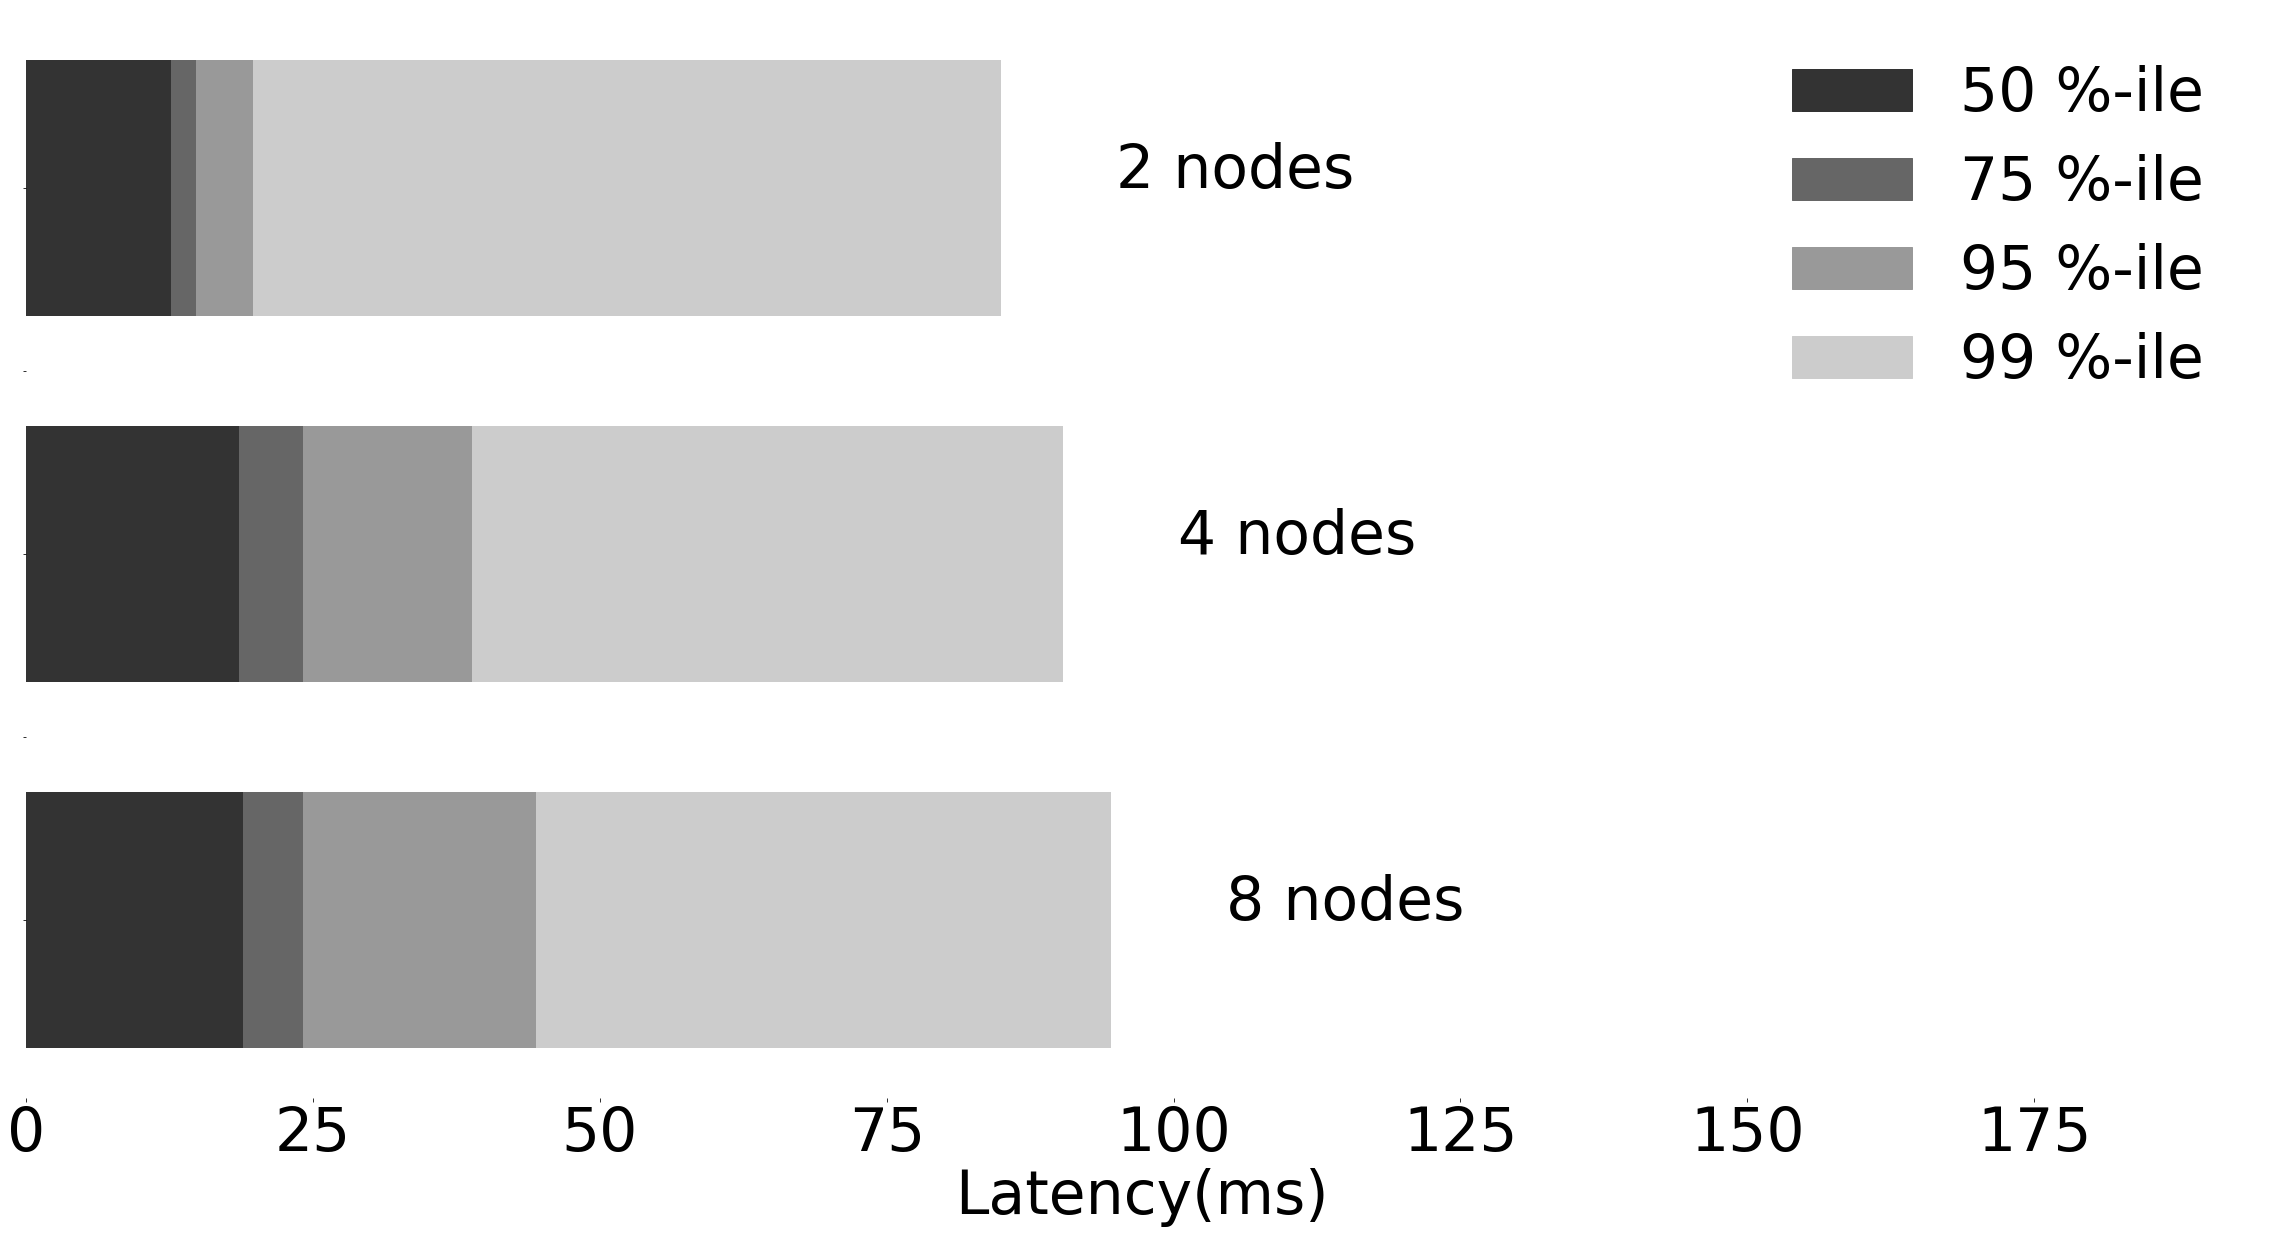

In [49]:
def plot():
    fig, ax = plt.subplots(figsize=(40, 20))
    w = .70
    ind_fs = [1, 2.0, 3.0]

    def do_plot(q, c):
        worker2 =  np.percentile(latencies[2], q)
        worker4 =  np.percentile(latencies[4], q)
        worker8 =  np.percentile(latencies[8], q)
        ax.barh(ind_fs, [worker2, worker4, worker8], color=c, height=w, left=0)
#         ax.barh(ind_fl, [fl_q['at_most_once'], fl_q['exactly_once']], color=c, height=w, left=0)

    do_plot(99, '.8')
    do_plot(90, '.6')
    do_plot(75, '.4')
    do_plot(50, '.2')

    plt.gca().invert_yaxis()

    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(60)

    ax.set_yticklabels([])
    plt.xlim((0, np.percentile(latencies[8], 99) + 100))

    ax.set_xlabel('Latency(ms)', fontsize=60)

    ax.text(np.percentile(latencies[2], 99) + 10, 1, '2 nodes', fontsize = 60)
    ax.text(np.percentile(latencies[4], 99) + 10, 2, '4 nodes', fontsize = 60)
    ax.text(np.percentile(latencies[8], 99) + 10, 3, '8 nodes', fontsize = 60)

    patch_99 = mpatches.Patch(color='.8', label='99 %-ile')
    patch_90 = mpatches.Patch(color='.6', label='95 %-ile')
    patch_75 = mpatches.Patch(color='.4', label='75 %-ile')
    patch_50 = mpatches.Patch(color='.2', label='50 %-ile')
    ax.legend(handles=[patch_99, patch_90, patch_75, patch_50][::-1], fontsize = 60, frameon=False, bbox_to_anchor=(1, 1), ncol=1)


    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    fig.savefig("classifier_latencies.pdf", format='pdf', bbox_inches='tight')
    
plot()

In [95]:
throughput = {}
throughput[2] = 46
throughput[4] = 69
throughput[8] = 95
ci = [(43, 49), (66, 72), (91, 98)]

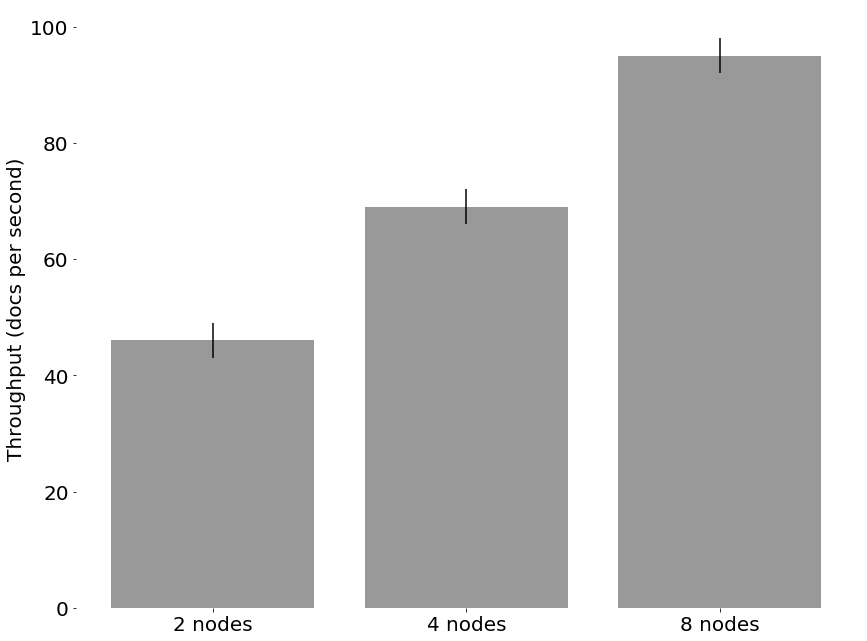

In [102]:
y_r = [list(throughput.values())[i] - ci[i][1] for i in range(len(ci))]
fig, ax = plt.subplots(figsize=(14, 11))
ax.bar(range(len(throughput)), list(throughput.values()), align='center', color='.6', yerr=y_r)
ticks = [str(i) + ' nodes' for i in latencies.keys()]
plt.xticks(range(len(throughput)), ticks)
plt.tick_params(labelsize=20)
plt.ylabel('Throughput (docs per second)', fontsize=20)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
fig.savefig("classifier_throughput.pdf", format='pdf', bbox_inches='tight')